In [ ]:
from inspect import getsourcefile
import os.path
import sys
current_path = os.path.abspath(getsourcefile(lambda:0))
parent_dir = os.path.split(os.path.dirname(current_path))[0]
sys.path.insert(0, parent_dir)
import common.load_notebooks
import common.utils

In [2]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
print('done')
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
done


In [3]:

n_input=784
n_classes=10
training_iters = 200000
batchsize=128
learning_rate = 0.001
dropout = 0.75 
display_step = 10
stddev=0.01

learning_rate = 0.01
training_epochs = 20
batchsize = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)


x = tf.placeholder(tf.float32, [None, n_input])

# Initializing the variables
weights = {
    'encoder_h1' :  tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'encoder_h2' :  tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'decoder_h1' :  tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1], stddev=stddev)),
    'decoder_h2' :  tf.Variable(tf.random_normal([n_hidden_1, n_input], stddev=stddev))
}

biases = {
    'encoder_b1' : tf.Variable(tf.random_normal([n_hidden_1], stddev=stddev)),
    'encoder_b2' : tf.Variable(tf.random_normal([n_hidden_2], stddev=stddev)),
    'decoder_b1' : tf.Variable(tf.random_normal([n_hidden_1], stddev=stddev)),
    'decoder_b2' : tf.Variable(tf.random_normal([n_input], stddev=stddev)),
}

def wireup(x, weights, biases):
    encoder_l_out = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    encoder_2_out = tf.nn.sigmoid(tf.add(tf.matmul(encoder_l_out, weights['encoder_h2']), biases['encoder_b2']))
    decoder_1_out = tf.nn.sigmoid(tf.add(tf.matmul(encoder_2_out, weights['decoder_h1']), biases['decoder_b1']))
    decoder_2_out = tf.nn.sigmoid(tf.add(tf.matmul(decoder_1_out, weights['decoder_h2']), biases['decoder_b2']))
    return decoder_2_out


    

In [4]:

pred = wireup(x, weights, biases)

y_pred = pred
# Targets (Labels) are the input data.
y_true = x
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
init = tf.initialize_all_variables()

In [5]:
from IPython.display import display
p=common.utils.ProgressImageWidget()
display(p)
sess = tf.InteractiveSession()
sess.run(init)
total_batch = int(mnist.train.num_examples/batchsize)

plotter = common.utils.Plotter(xlabel='no. of epochs',ylabel='loss', title='autoencoder loss')
plotter.add_channel(num_samples=int(np.floor(training_epochs/display_step)),
                        channel_name='train',
                        legend='train')

for epoch in range(training_epochs):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batchsize)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs})
    if epoch % display_step == 0:
        plotter.add_sample( epoch,  c, channel_name='train')
        p.value=plotter.plot()
        #print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

Optimization Finished!


/usr/local/lib64/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


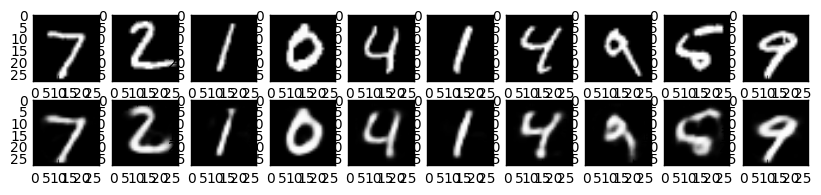

In [6]:
%matplotlib inline
encode_decode = sess.run(
    y_pred, feed_dict={x: mnist.test.images[:examples_to_show]})

f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)), cmap='gray')
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)), cmap='gray')
f.show()